# Implementing KNN Regression manually

#### Load the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Iris dataset

In [7]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Get the dataset of Sepal Length and Sepal Width

In [20]:
# shuffle the dataset
data = data.sample(frac = 1)

x = data['SepalLengthCm']
y = data['SepalWidthCm']

##### Separate dataset into Training and Testing dataset

In [21]:
train_size = int(0.8 * len(x))
test_size = len(x) - train_size

x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

### Plot the dataset for visualization

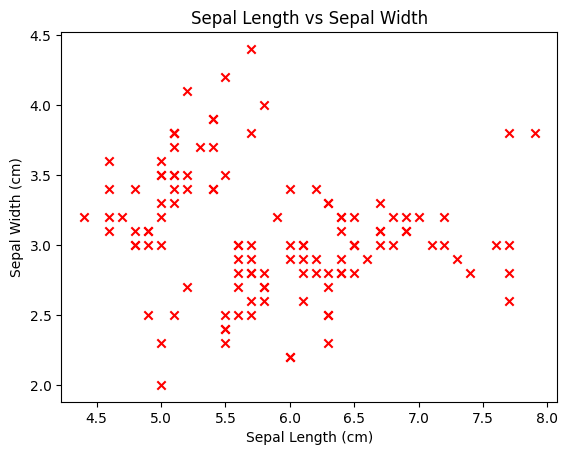

In [26]:
# give some details to the graph
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# plot the graph of Sepal Length and Sepal Width
plt.scatter(x_train, y_train, color = 'red', marker = 'x')

plt.show()

#### Define Eucledian Distance Function

In [27]:
def eucledian_distance(x1, x2):
    d = np.sqrt(np.sum((x1 - x2) ** 2))
    return d

### Create a Prediction function which uses KNN algorithm

In [44]:
def predict(x, k = 5):
    distances = []
    nearest_labels = []

    # find out the distance between each point in sepal length and width graph
    for x1 in x_train:
        distances.append(eucledian_distance(x, x1))

    # find the nearest neighbours of the points (smallest distance)
    nearest_indices = np.argsort(distances)[:k]
    
    # find out the corresponding labels for nearest neighbours
    for i in nearest_indices:
        nearest_labels.append(y_train.iloc[i])
    
    y = np.round((np.sum(nearest_labels) / k), 2)
    return y

#### Find out the predicted values using different values of k

In [73]:
# prediction for k = 5
y_prediction_k5 = [predict(x, k = 5) for x in x_test]

# prediction for k = 15
y_prediction_k15 = [predict(x, k = 15) for x in x_test]

# prediction for k = 25
y_prediction_k25 = [predict(x, k = 25) for x in x_test]

# prediction for k = 30
y_prediction_k30 = [predict(x, k = 30) for x in x_test]

# prediction for k = 40
y_prediction_k40 = [predict(x, k = 40) for x in x_test]

### Find the accuracy for different values of k

*Accuracy = 100 - Mean Squared Error*

In [76]:
# accuracy for k = 5
accuracy_k5 = 100 - ((np.sum((y_prediction_k5 - y_test) ** 2) / test_size) * 100)

# accuracy for k = 15
accuracy_k15 = 100 - ((np.sum((y_prediction_k15 - y_test) ** 2) / test_size) * 100)

# accuracy for k = 25
accuracy_k25 = 100 - ((np.sum((y_prediction_k25 - y_test) ** 2) / test_size) * 100)

# accuracy for k = 30
accuracy_k30 = 100 - ((np.sum((y_prediction_k30 - y_test) ** 2) / test_size) * 100)

# accuracy for k = 40
accuracy_k40 = 100 - ((np.sum((y_prediction_k40 - y_test) ** 2) / test_size) * 100)

print('Accuracy (k = 5)  :', np.round(accuracy_k5, 2), '%')
print('Accuracy (k = 15) :', np.round(accuracy_k15, 2), '%')
print('Accuracy (k = 25) :', np.round(accuracy_k25, 2), '%')
print('Accuracy (k = 30) :', np.round(accuracy_k30, 2), '%')
print('Accuracy (k = 40) :', np.round(accuracy_k40, 2), '%')

Accuracy (k = 5)  : 83.35 %
Accuracy (k = 15) : 88.68 %
Accuracy (k = 25) : 88.72 %
Accuracy (k = 30) : 87.53 %
Accuracy (k = 40) : 85.86 %


### Plot the graph for the predicted values

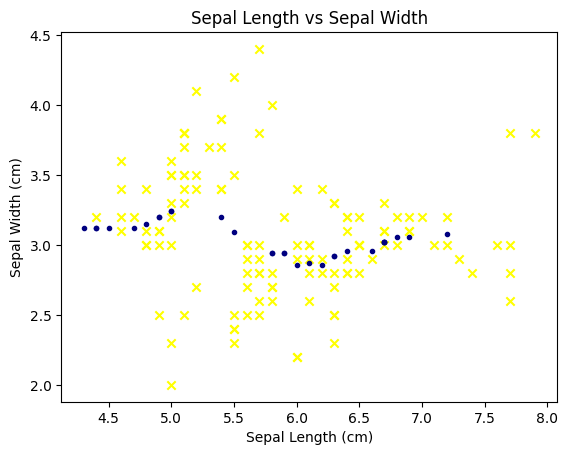

In [89]:
# give some details to the graph
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# plot the graph of Sepal Length and Sepal Width
plt.scatter(x_train, y_train, color = 'yellow', marker = 'x')

# plot the predicted values of Sepal Width
plt.scatter(x_test, y_prediction_k25, color = 'navy', marker = '.')

plt.show()

# Implementing KNN Regression using sklearn library

#### Load the necessary libraries

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#### Separate the training and testing datasets

In [171]:
data = pd.read_csv('Iris.csv')
data.head()

x = data['SepalLengthCm']
y = data['SepalWidthCm']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Train the model

In [172]:
# knn regression for k = 5
knn_k5 = KNeighborsRegressor(n_neighbors = 5)

# knn regression for k = 15
knn_k15 = KNeighborsRegressor(n_neighbors = 15)

# knn regression for k = 25
knn_k25 = KNeighborsRegressor(n_neighbors = 25)

# knn regression for k = 30
knn_k30 = KNeighborsRegressor(n_neighbors = 30)

# knn regression for k = 40
knn_k40 = KNeighborsRegressor(n_neighbors = 40)

# input the training dataset
knn_k5.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
knn_k15.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
knn_k25.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
knn_k30.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
knn_k40.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

KNeighborsRegressor(n_neighbors=40)

### Make the predictions

In [173]:
# find the predictions for different values of k
y_pred_k5 = knn_k5.predict(np.array(x_test).reshape(-1, 1))
y_pred_k15 = knn_k15.predict(np.array(x_test).reshape(-1, 1))
y_pred_k25 = knn_k25.predict(np.array(x_test).reshape(-1, 1))
y_pred_k30 = knn_k30.predict(np.array(x_test).reshape(-1, 1))
y_pred_k40 = knn_k40.predict(np.array(x_test).reshape(-1, 1))

### Find the accuracy for different values of k

In [174]:
# accuracy for k = 5
accuracy_sk_k5 = 100 - ((np.sum((y_pred_k5.flatten() - y_test) ** 2) / test_size) * 100)

# accuracy for k = 15
accuracy_sk_k15 = 100 - ((np.sum((y_pred_k15.flatten() - y_test) ** 2) / test_size) * 100)

# accuracy for k = 25
accuracy_sk_k25 = 100 - ((np.sum((y_pred_k25.flatten() - y_test) ** 2) / test_size) * 100)

# accuracy for k = 30
accuracy_sk_k30 = 100 - ((np.sum((y_pred_k30.flatten() - y_test) ** 2) / test_size) * 100)

# accuracy for k = 40
accuracy_sk_k40 = 100 - ((np.sum((y_pred_k40.flatten() - y_test) ** 2) / test_size) * 100)

print('Accuracy (k = 5)  :', np.round(accuracy_sk_k5, 2), '%')
print('Accuracy (k = 15) :', np.round(accuracy_sk_k15, 2), '%')
print('Accuracy (k = 25) :', np.round(accuracy_sk_k25, 2), '%')
print('Accuracy (k = 30) :', np.round(accuracy_sk_k30, 2), '%')
print('Accuracy (k = 40) :', np.round(accuracy_sk_k40, 2), '%')

Accuracy (k = 5)  : 82.11 %
Accuracy (k = 15) : 82.63 %
Accuracy (k = 25) : 84.0 %
Accuracy (k = 30) : 83.86 %
Accuracy (k = 40) : 83.98 %


## Therefore, our implementation of KNN Regression with k = 25 has the best accuracy.